In [5]:
pip install xarray

In [14]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pylab inline
%matplotlib inline
import netCDF4 as nc
import xarray as xr
import pylab as plt
import scipy.io
import math
import numpy.matlib
import xlrd
import pandas as pd
from scipy import stats 
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
### Load excel datasets (CSV format works as well)
dat_udw = pd.read_excel('/Users/Miranda Sitofie/Dropbox/Session_3_data/SANAE53_data.xlsx')
dat_ctd = pd.read_excel('/Users/Miranda Sitofie/Dropbox/Session_3_data/SANAE53_data_ctd.xlsx')

In [21]:
### display data comlumns; get information of the available variables 
dat_udw.columns

Index(['Sample Date', 'bottle', 'Lat.', 'Long.', 'niskin', 'depth', 'DIC_corr',
       'AT_corr', 'IntkeTemp', 'Salinity', 'Comment', 'Unnamed: 11'],
      dtype='object')

In [41]:
dat_udw.AT_corr

0     2298.919228
1     2302.085982
2     2296.898672
3     2302.798618
4     2297.020246
         ...     
91    2277.563565
92    2296.946170
93    2267.963365
94    2273.830639
95    2280.695686
Name: AT_corr, Length: 96, dtype: float64

In [43]:
dat_udw.DIC_corr

0     2165.191635
1     2153.900628
2     2131.479915
3     2143.738722
4     2136.079800
         ...     
91    2139.812064
92    2156.741542
93    2116.643835
94    2128.841843
95    2136.448129
Name: DIC_corr, Length: 96, dtype: float64

In [44]:
dat_udw.DIC_corr.array

<PandasArray>
[ 2165.191634509885,  2153.900628006998, 2131.4799150941226,
 2143.7387221543995, 2136.0798002790443,   2146.17691680009,
  2145.057256526528,  2150.786689277731, 2156.2538592621536,
 2157.4239546831736,   2163.88974058726, 2175.8933056822098,
  2176.195916566957,  2150.181467508238, 2146.2273519475484,
 2158.5436149567363,  2150.988429867562,  2159.340490286569,
 2149.0214591167087,  2138.167815383796, 2069.0399151103657,
 2056.1570774498464,  2105.418590989476,  2115.967751398857,
 2104.5631651157696,   2092.19603359944,  2088.488194336774,
 2091.1007640069474, 2092.3065653931812,  2094.667926441223,
 2040.2963322669564, 2038.5378719120317, 2031.6547556656133,
   2046.46601602652, 2037.4420971732106, 2038.9323828851461,
 2044.1987303671888, 2036.5358423483847, 2032.8305551458568,
 2137.3193438524945,  2133.896822620967, 2126.6904582683674,
 2139.1460267385296, 2136.0346438007773, 2127.9550848817767,
 2127.7342770603873, 2135.8439461368507,  2126.238805906436,
  2080.055

In [45]:
dat_udw.DIC_corr.array

<PandasArray>
[ 2165.191634509885,  2153.900628006998, 2131.4799150941226,
 2143.7387221543995, 2136.0798002790443,   2146.17691680009,
  2145.057256526528,  2150.786689277731, 2156.2538592621536,
 2157.4239546831736,   2163.88974058726, 2175.8933056822098,
  2176.195916566957,  2150.181467508238, 2146.2273519475484,
 2158.5436149567363,  2150.988429867562,  2159.340490286569,
 2149.0214591167087,  2138.167815383796, 2069.0399151103657,
 2056.1570774498464,  2105.418590989476,  2115.967751398857,
 2104.5631651157696,   2092.19603359944,  2088.488194336774,
 2091.1007640069474, 2092.3065653931812,  2094.667926441223,
 2040.2963322669564, 2038.5378719120317, 2031.6547556656133,
   2046.46601602652, 2037.4420971732106, 2038.9323828851461,
 2044.1987303671888, 2036.5358423483847, 2032.8305551458568,
 2137.3193438524945,  2133.896822620967, 2126.6904582683674,
 2139.1460267385296, 2136.0346438007773, 2127.9550848817767,
 2127.7342770603873, 2135.8439461368507,  2126.238805906436,
  2080.055

In [22]:
dat_ctd.columns

Index(['Date', 'bottle', 'Lat.', 'Long.', 'niskin', 'depth', 'DIC_corr',
       'AT_corr', 'IntakeTemp', 'Salinity'],
      dtype='object')

In [23]:
#### List the actual datasets 
dat_ctd

,Date,bottle,Lat.,Long.,niskin,depth,DIC_corr,AT_corr,IntakeTemp,Salinity
0,20140208,SAN201402085312,-43.00,7.61,1,1000,2192.701110,2304.796343,3.0072,34.3509
1,20140208,SAN201402085313,-43.00,7.61,3,640,2162.259888,2284.102123,3.8669,34.2050
2,20140208,SAN201402085316,-43.00,7.61,4,430,2118.514426,2276.977310,5.2348,34.2396
3,20140208,SAN201402085314,-43.00,7.61,5,340,2143.015898,2280.034397,6.5382,34.3658
4,20140208,SAN201402085315,-43.00,7.61,7,200,2092.350872,2284.531790,7.8054,34.4059
...,...,...,...,...,...,...,...,...,...,...
114,20140129,SAN1401275312A,-70.52,-8.07,24,3,2162.600752,2286.288041,-1.4936,33.8048
115,20140130,SAN1401305313,-70.52,-8.07,2,223,2215.829782,2320.142729,-1.8466,34.3141
116,20140130,SAN1401305314,-70.52,-8.07,8,80,2203.419757,2316.271227,-1.7883,34.2434
117,20140130,SAN1401305315,-70.52,-8.07,14,25,2195.717677,2304.022919,-1.6708,34.0795


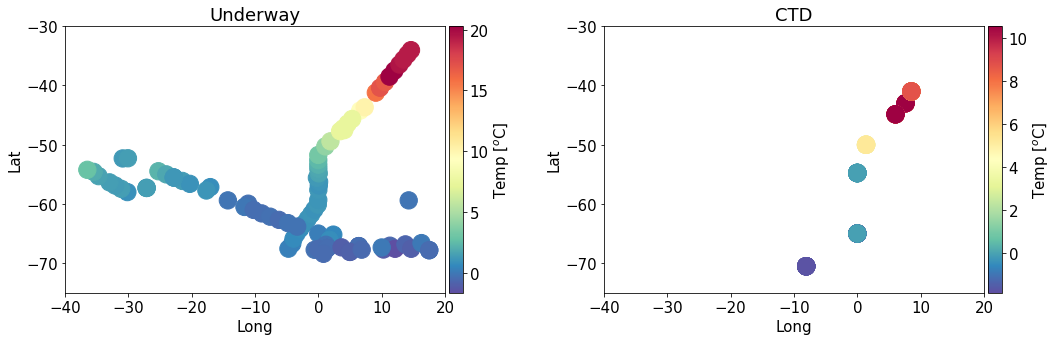

In [24]:
### Location of the dataset (Lat and long), and displaying one variable in colorbar (Temperature)
plt.rcParams['font.size'] = 15
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3
ms = 300
plt.subplot(121)
plt.scatter(dat_udw['Long.'],dat_udw['Lat.'],c = dat_udw['IntkeTemp'],s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)

plt.subplot(122)
plt.scatter(dat_ctd['Long.'],dat_ctd['Lat.'],c = dat_ctd['IntakeTemp'],s = ms,cmap = 'Spectral_r')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.title('CTD')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)


plt.tight_layout()

In [25]:
import gsw
gsw.density.rho?

In [26]:
dat_ctd['depth'].values

array([1000,  640,  430,  340,  200,  150,  100,   70,   60,   35,    5,
       1000,  500,  375,  240,  170,  125,  100,   80,   60,   40,    5,
       1000,  500,  150,  100,   85,   60,   40,   20,    5, 1002,  750,
        550,  450,  350,  300,  260,  220,  200,  180,  160,  140,  120,
        100,   90,   80,   70,   60,   50,   40,   30,   15,   10,  750,
        550,  450,  350,  350,  350,  300,  260,  220,  200,  180,  180,
        180,  160,  140,  120,   70,   60,   50,   80,   90,   40,   30,
         15, 1300, 1000,  750,  500,  400,  400,  300,  200,  150,  125,
        100,   80,   70,   60,   60,   60,   70,   70,   70,   50,   40,
         35,   25,   15,    5,  226,   70,   30,    3,  220,   73,   18,
          4,  222,   30,   16,    3,  223,   80,   25,    3], dtype=int64)

In [28]:
### Computes ocean density
density_ctd  = gsw.density.rho(dat_ctd['Salinity'].values,dat_ctd['IntakeTemp'].values,dat_ctd['depth'].values) - 1000
density_udw  = gsw.density.rho(dat_udw['Salinity'].values,dat_udw['IntkeTemp'].values,0)  - 1000

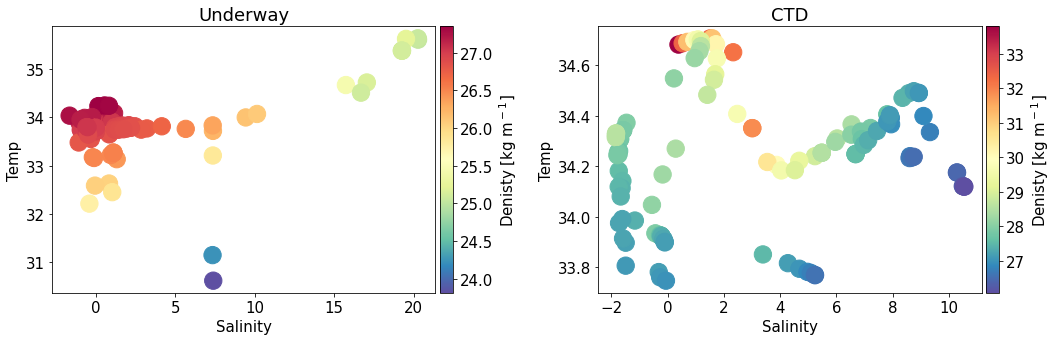

In [29]:
### Water mass properties
plt.rcParams['font.size'] = 15
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3
ms = 300
plt.subplot(121)
plt.scatter(dat_udw['IntkeTemp'],dat_udw['Salinity'],c = density_udw,s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Denisty [kg m$^-$$^1$]',fontsize = 15)
plt.ylabel('Temp')
plt.xlabel('Salinity')


plt.subplot(122)
plt.scatter(dat_ctd['IntakeTemp'],dat_ctd['Salinity'],c = density_ctd,s = ms,cmap = 'Spectral_r')
plt.title('CTD')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Denisty [kg m$^-$$^1$]',fontsize = 15)
plt.ylabel('Temp')
plt.xlabel('Salinity')

plt.tight_layout()

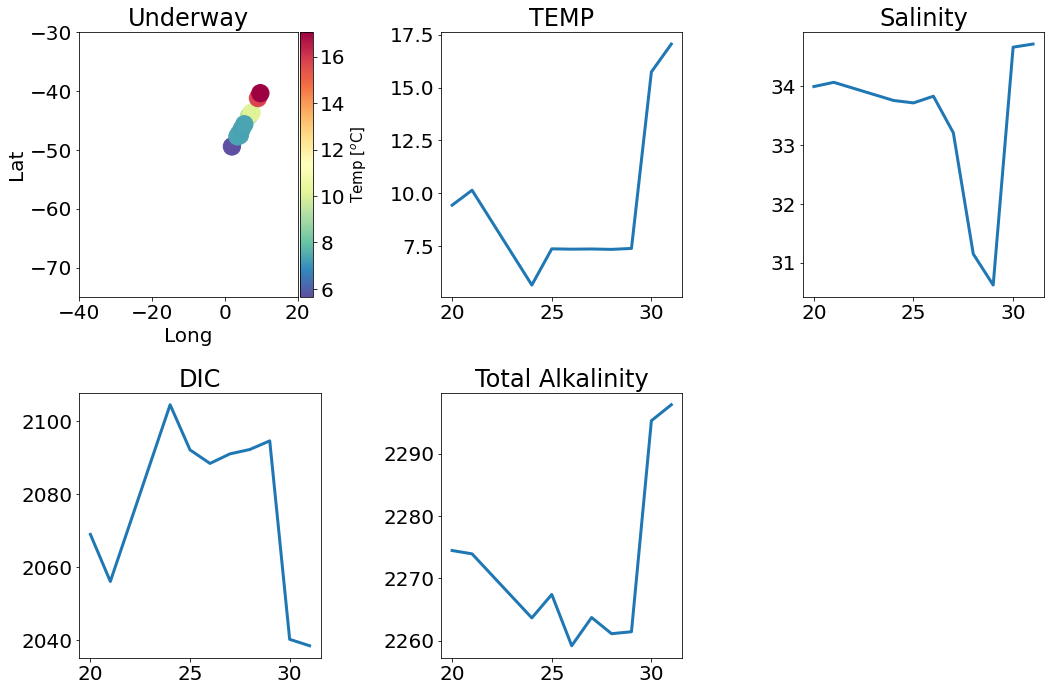

In [30]:
### subsampling the datasets by location
i = (dat_udw['Lat.'] > -50) & (dat_udw['Lat.'] < -40)
##check 

plt.rcParams['font.size'] = 20
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
plt.scatter(dat_udw.loc[i,'Long.'],dat_udw.loc[i,'Lat.'],c = dat_udw.loc[i,'IntkeTemp'],s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)

plt.subplot(2,3,2)
plt.plot(dat_udw.loc[i,'IntkeTemp'])
plt.title('TEMP')

plt.subplot(2,3,3)
plt.plot(dat_udw.loc[i,'Salinity'])
plt.title('Salinity')

plt.subplot(2,3,4)
plt.plot(dat_udw.loc[i,'DIC_corr'])
plt.title('DIC')

plt.subplot(2,3,5)
plt.plot(dat_udw.loc[i,'AT_corr'])
plt.title('Total Alkalinity')
plt.tight_layout()

C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

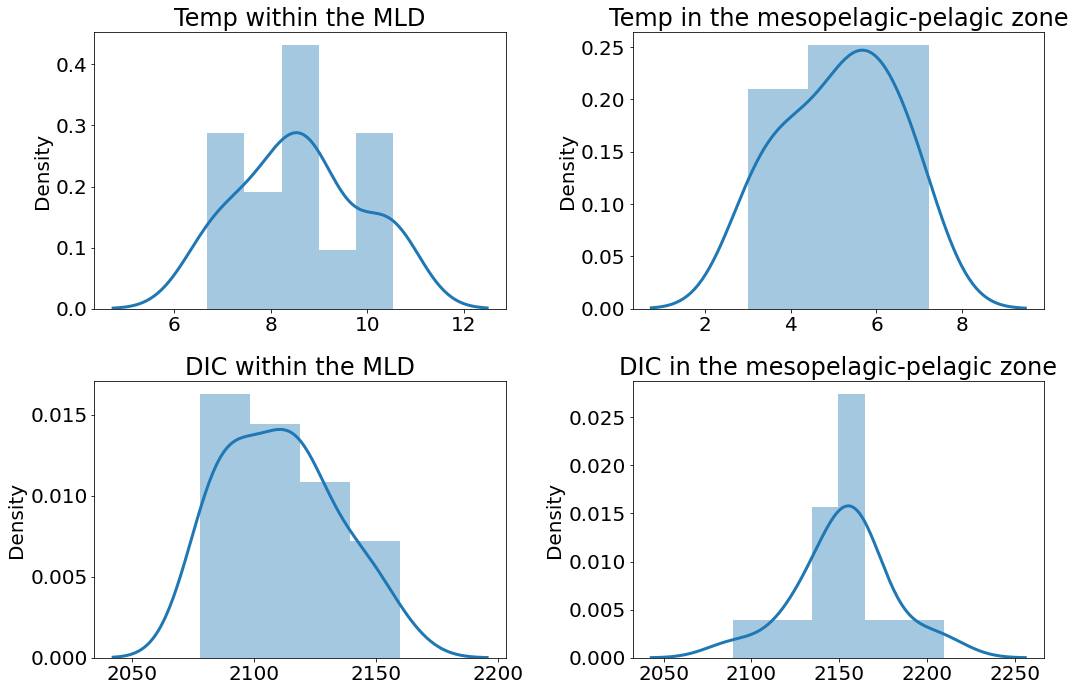

In [31]:
### subsampling the datasets depth and location 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

i_mld = (dat_ctd['depth'] < 200) & (dat_ctd['Lat.'] > -50) & (dat_ctd['Lat.'] < -40)
i_deep = (dat_ctd['depth'] > 200) & (dat_ctd['Lat.'] > -50) & (dat_ctd['Lat.'] < -40)
##check
# sns.regplot(dat_ctd.loc[i_surf,'IntkeTemp'])
plt.subplot(2,2,1)
sns.distplot(dat_ctd.loc[i_mld,'IntakeTemp'].values)
plt.title('Temp within the MLD')
plt.subplot(2,2,2)
sns.distplot(dat_ctd.loc[i_deep,'IntakeTemp'].values)
plt.title('Temp in the mesopelagic-pelagic zone')

plt.subplot(2,2,3)
sns.distplot(dat_ctd.loc[i_mld,'DIC_corr'].values)
plt.title('DIC within the MLD')
plt.subplot(2,2,4)
sns.distplot(dat_ctd.loc[i_deep,'DIC_corr'].values)
plt.title('DIC in the mesopelagic-pelagic zone')

plt.tight_layout()

C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_3020/9977021.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


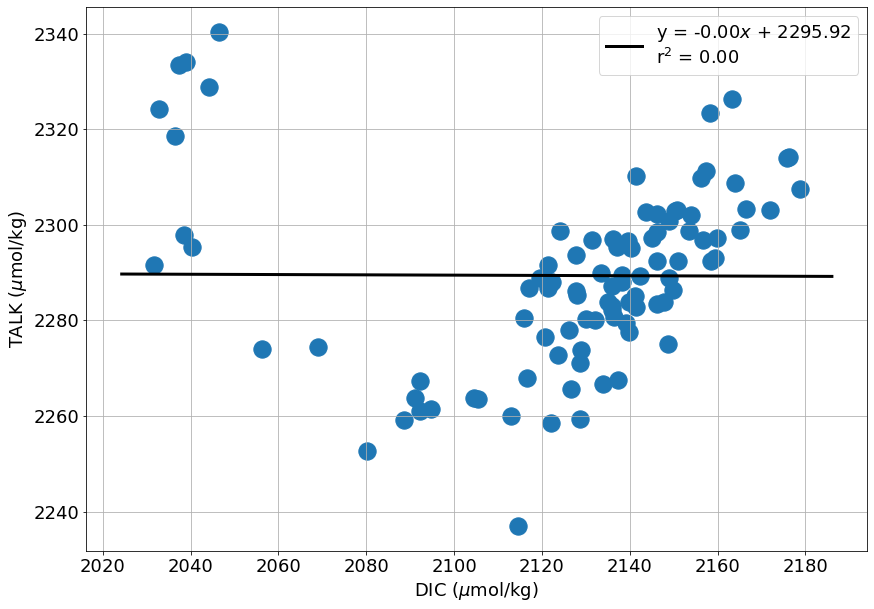

In [32]:
#### plot a regression between DIC and Total Alkanility for underway measurements

x = dat_udw['DIC_corr'].values
y = dat_udw['AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]

b, res, rank, s = plt.linalg.lstsq(x, y)

plt.figure(figsize=[14,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.scatter(dat_udw['DIC_corr'].values,dat_udw['AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
# plt.title('')

plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
#### plot a regression between DIC and Total Alkanility for underway measurements
### find what divide the two positive correlation in high DIC waters and a negative correlation in low DIC waters?

C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_3020/447316824.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


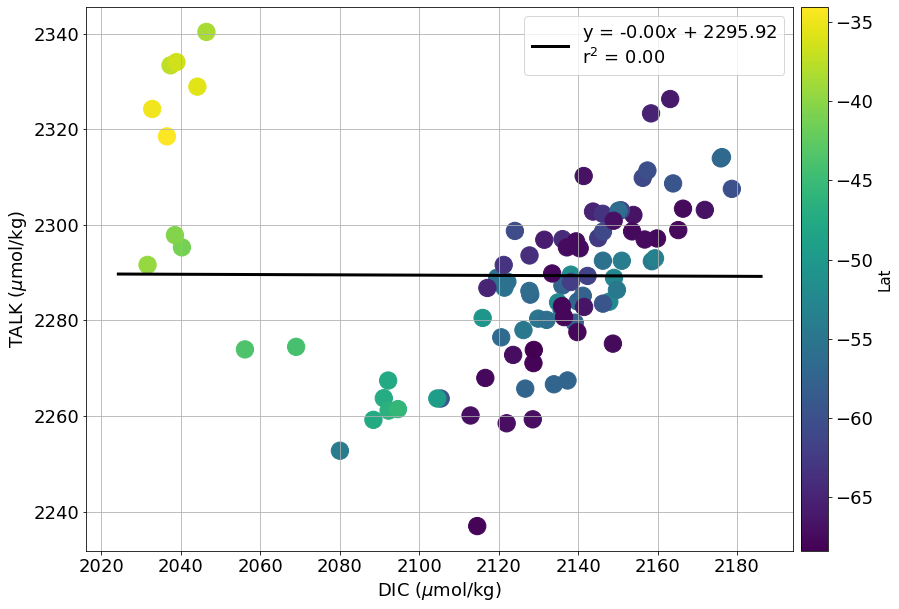

In [33]:
x = dat_udw['DIC_corr'].values
y = dat_udw['AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]

b, res, rank, s = plt.linalg.lstsq(x, y)

plt.figure(figsize=[14,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.scatter(dat_udw['DIC_corr'].values,dat_udw['AT_corr'].values,c =  dat_udw['Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
# plt.title('')

plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [19]:
dat_udw

,Sample Date,bottle,Lat.,Long.,niskin,depth,DIC_corr,AT_corr,IntkeTemp,Salinity,Comment,Unnamed: 11
0,20140202,SAN1402015321,-67.55,-4.71,0,5,2165.191635,2298.919228,0.2861,33.9426,NaN,CTN underway
1,20140202,SAN1402015322,-66.72,-4.11,0,5,2153.900628,2302.085982,0.3004,33.9523,NaN,CTN underway
2,20140202,SAN1402025323,-65.86,-3.90,0,5,2131.479915,2296.898672,0.7292,33.8229,NaN,CTN underway
3,20140202,SAN1402025324,-65.00,-3.43,0,5,2143.738722,2302.798618,0.6739,33.8591,NaN,CTN underway
4,20140202,SAN1402025325,-64.18,-2.85,0,5,2136.079800,2297.020246,0.7367,33.8221,NaN,CTN underway
...,...,...,...,...,...,...,...,...,...,...,...,...
91,20140120,SAN1401205345C,-67.80,17.50,0,5,2139.812064,2277.563565,-0.0103,33.7147,NaN,IceShelf
92,20140120,SAN1401205343,-67.35,10.01,0,5,2156.741542,2296.946170,-0.0118,33.7873,NaN,IceShelf
93,20140120,SAN1401205342,-67.72,6.85,0,5,2116.643835,2267.963365,-0.6057,33.7965,NaN,IceShelf
94,20140120,SAN1401205341,-68.42,0.82,0,5,2128.841843,2273.830639,-0.4984,33.6419,NaN,IceShelf


C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/2816212392.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/2816212392.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:>

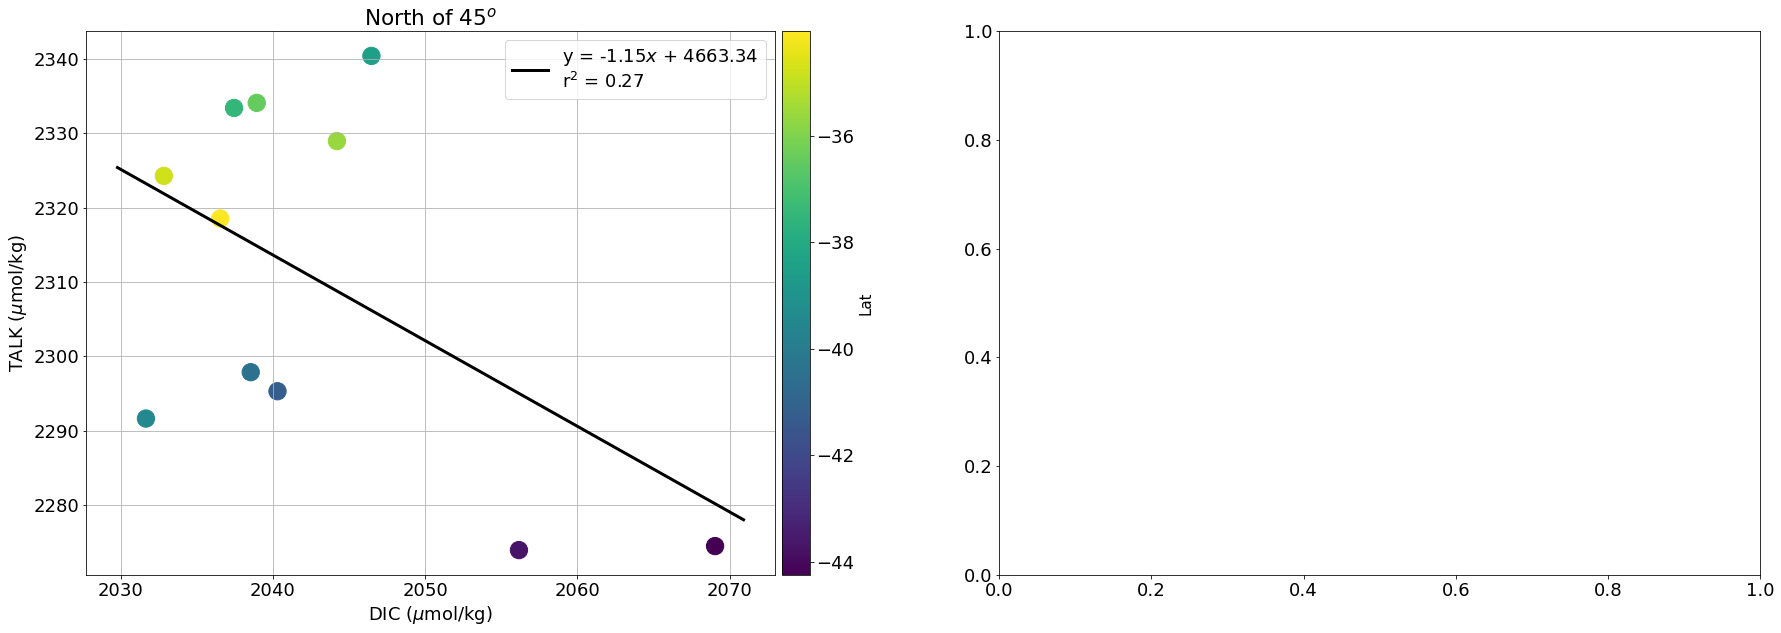

In [29]:
plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_45S = (dat_udw['Lat.'] > -45) 
i_S_45S = (dat_udw['Lat.'] < -45)

plt.subplot(121)

x = dat_udw.loc[i_N_45S,'DIC_corr'].values
y = dat_udw.loc[i_N_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_N_45S,'DIC_corr'].values,dat_udw.loc[i_N_45S,'AT_corr'].values,c =  dat_udw.loc[i_N_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_udw.loc[i_S_45S,'DIC_corr'].values
y = dat_udw.loc[i_S_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_S_45S,'DIC_corr'].values,dat_udw.loc[i_S_45S,'AT_corr'].values,c =  dat_udw.loc[i_S_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/2233309845.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/2233309845.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:>

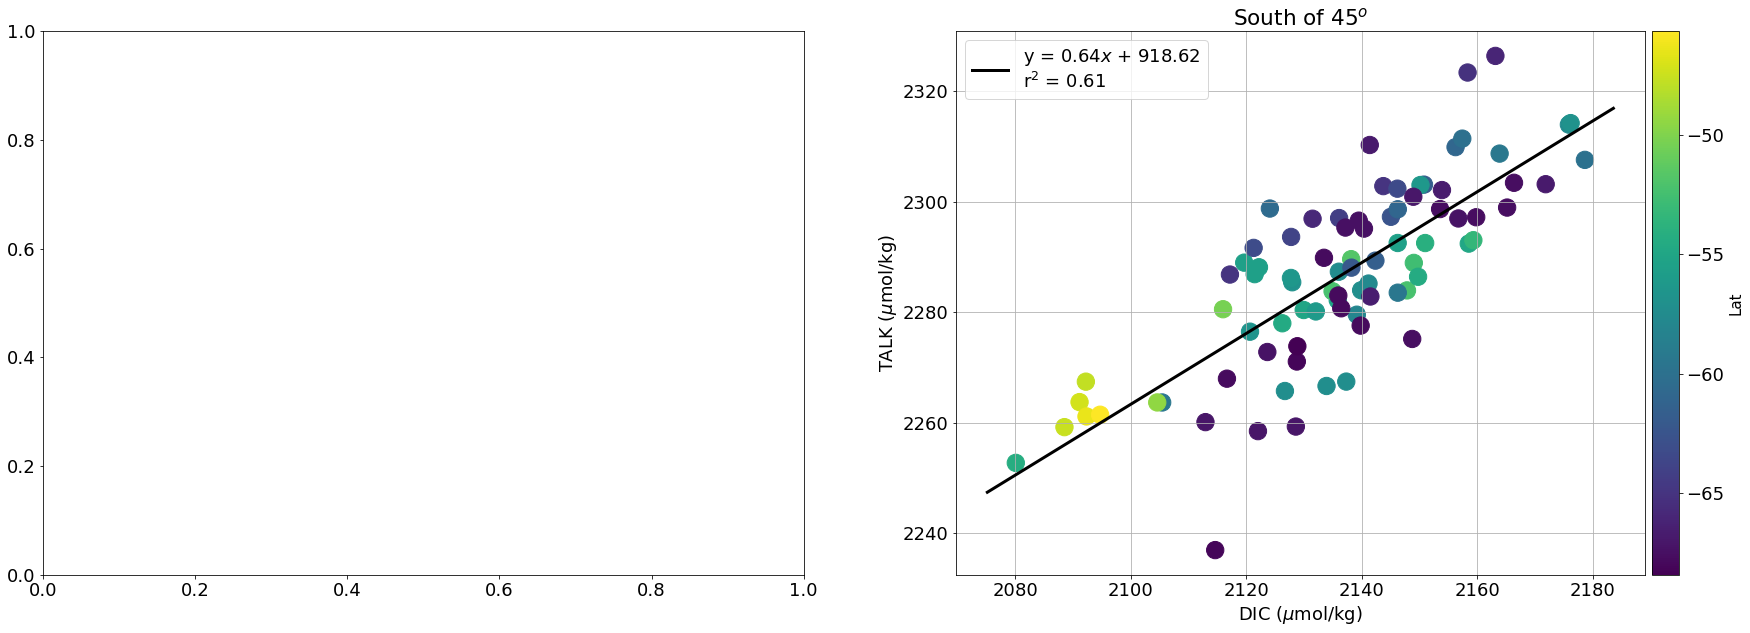

In [35]:
plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_45S = (dat_udw['Lat.'] > -45) 
i_S_45S = (dat_udw['Lat.'] < -45)

plt.subplot(121)

x = dat_udw.loc[i_N_45S,'DIC_corr'].values
y = dat_udw.loc[i_N_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_N_45S,'DIC_corr'].values,dat_udw.loc[i_N_45S,'AT_corr'].values,c =  dat_udw.loc[i_N_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_udw.loc[i_S_45S,'DIC_corr'].values
y = dat_udw.loc[i_S_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_S_45S,'DIC_corr'].values,dat_udw.loc[i_S_45S,'AT_corr'].values,c =  dat_udw.loc[i_S_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(121)


In [ ]:
####Exercise 1:  plot a regression of DIC and AT forregion norh of 50S and south of 50S

C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1218080947.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1218080947.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:>

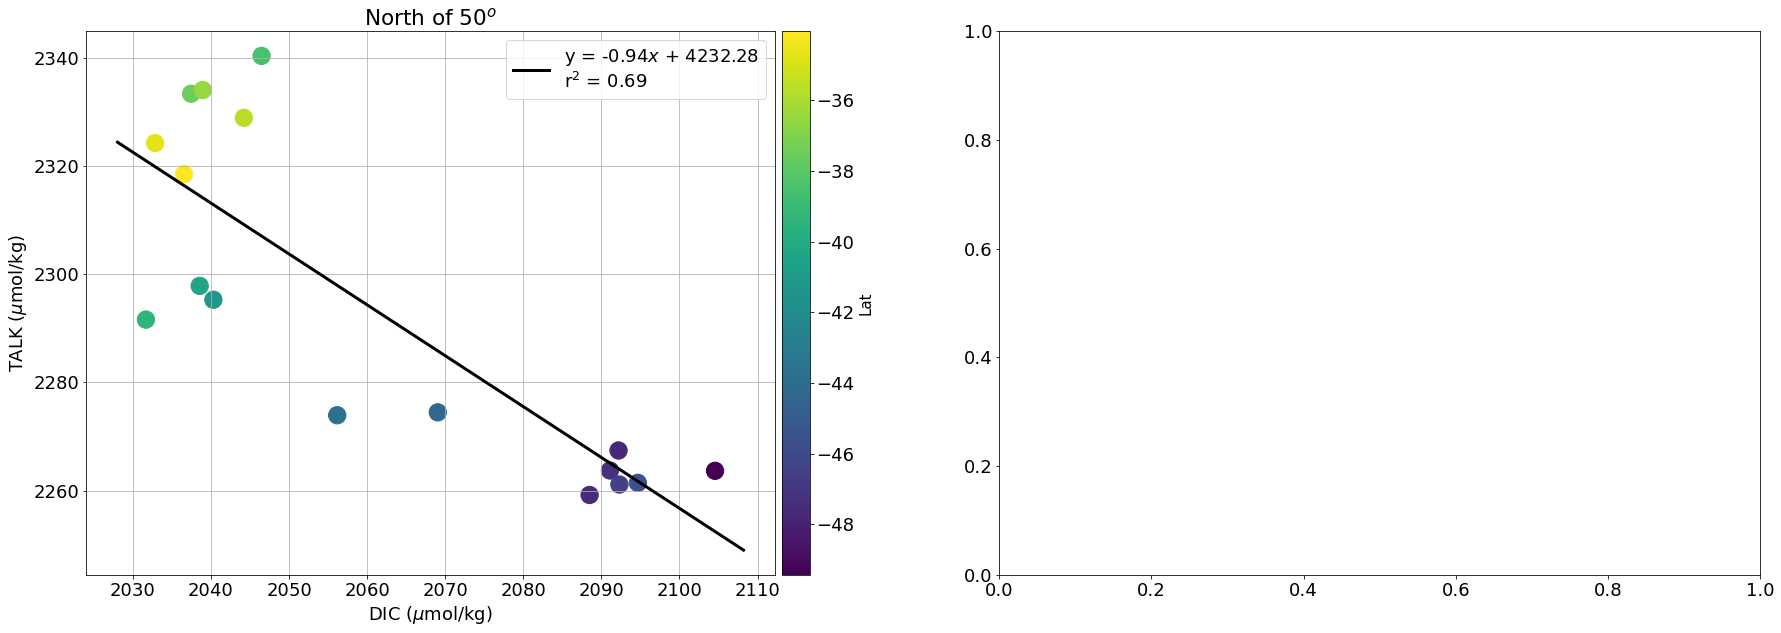

In [32]:
##Exercise 1a: plot for N of 50S

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S = (dat_udw['Lat.'] > -50) 
i_S_50S = (dat_udw['Lat.'] < -50)

plt.subplot(121)

x = dat_udw.loc[i_N_50S,'DIC_corr'].values
y = dat_udw.loc[i_N_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_N_50S,'DIC_corr'].values,dat_udw.loc[i_N_50S,'AT_corr'].values,c =  dat_udw.loc[i_N_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 
x = dat_udw.loc[i_S_50S,'DIC_corr'].values
y = dat_udw.loc[i_S_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_S_50S,'DIC_corr'].values,dat_udw.loc[i_S_50S,'AT_corr'].values,c =  dat_udw.loc[i_S_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)


C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/139371255.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/139371255.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:>

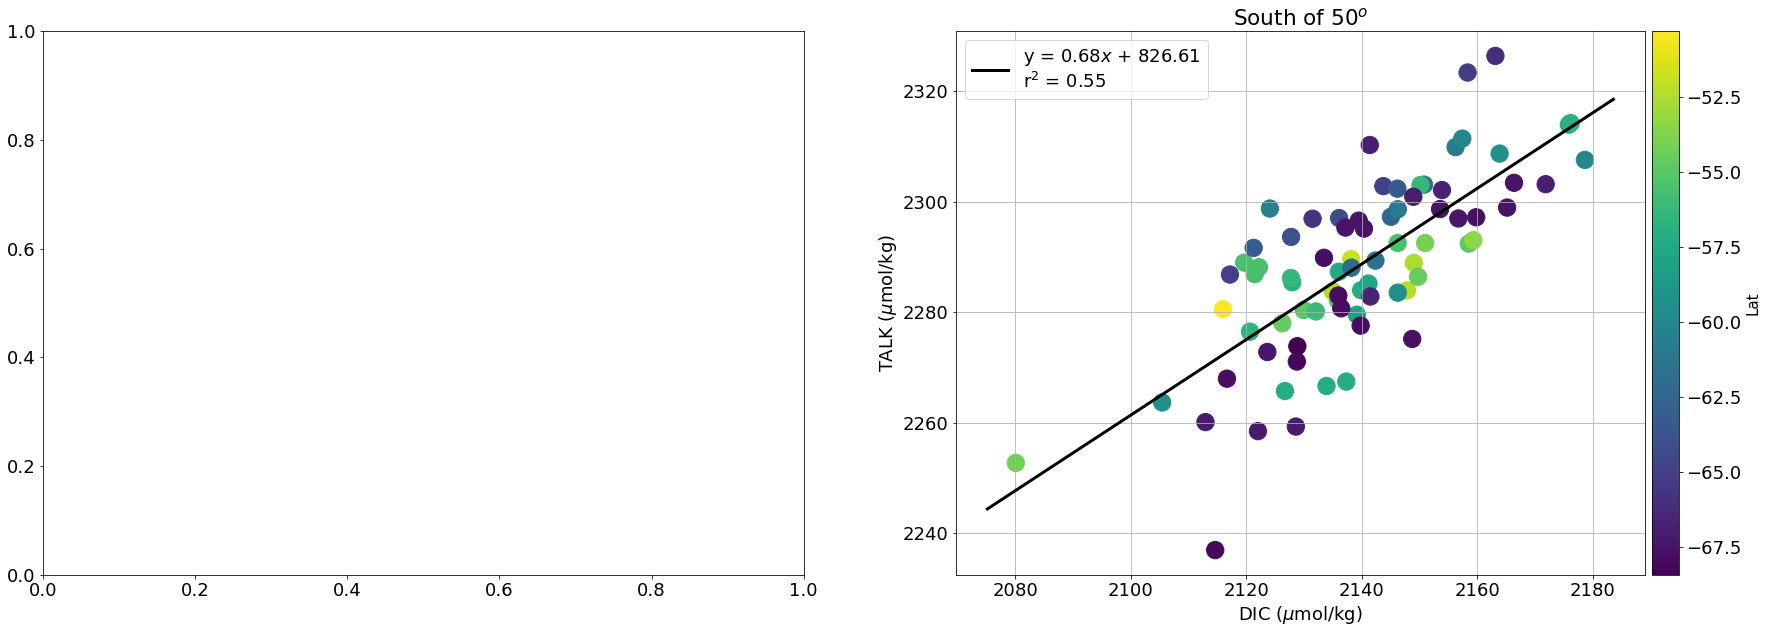

In [34]:
##Exercise 1b: plot for S of 50S

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S = (dat_udw['Lat.'] > -50) 
i_S_50S = (dat_udw['Lat.'] < -50)

plt.subplot(121)

x = dat_udw.loc[i_N_50S,'DIC_corr'].values
y = dat_udw.loc[i_N_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_N_50S,'DIC_corr'].values,dat_udw.loc[i_N_50S,'AT_corr'].values,c =  dat_udw.loc[i_N_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 
x = dat_udw.loc[i_S_50S,'DIC_corr'].values
y = dat_udw.loc[i_S_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_S_50S,'DIC_corr'].values,dat_udw.loc[i_S_50S,'AT_corr'].values,c =  dat_udw.loc[i_S_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(121)


C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1569192869.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1569192869.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:xlabel='DIC ($\\mu$mol/kg)', ylabel='TALK ($\\mu$mol/kg)'>

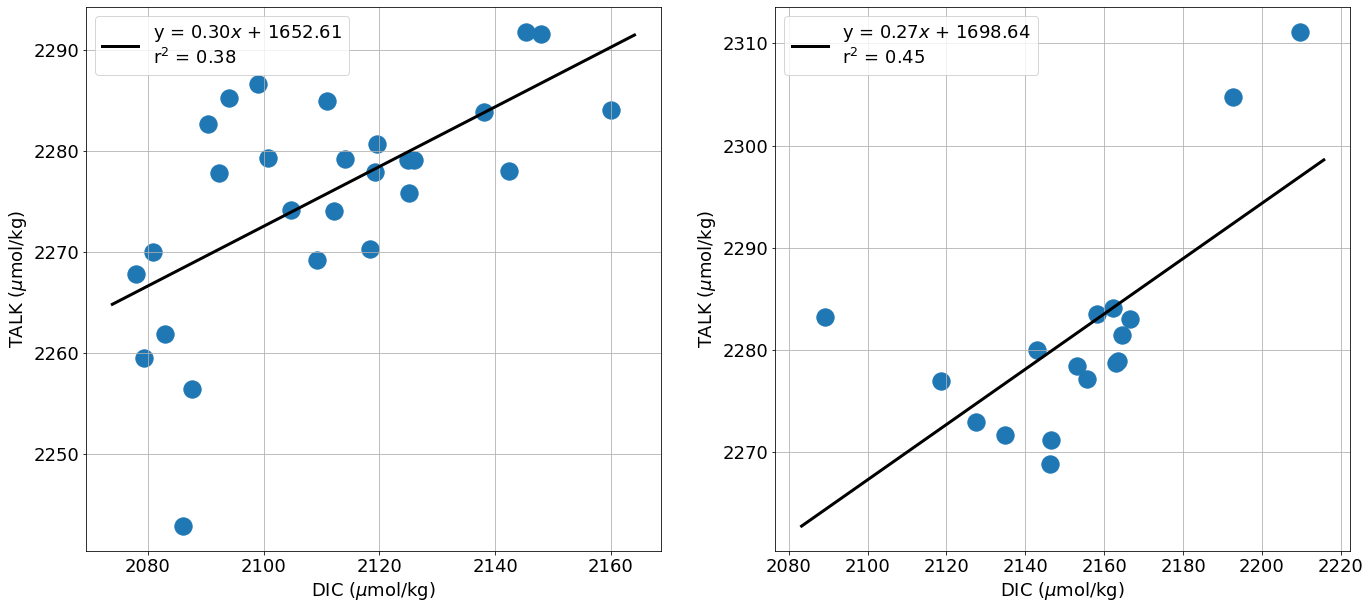

In [36]:
##Exercise 2a:Northof 50S
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S_mld =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] < 200)
i_N_50S_deep =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] > 200) 

plt.subplot(131)
x = dat_ctd.loc[i_N_50S_mld,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_mld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_mld,'DIC_corr'].values,dat_ctd.loc[i_N_50S_mld,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_N_50S_deep,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_deep,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_deep,'DIC_corr'].values,dat_ctd.loc[i_N_50S_deep,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)
plt.subplot(132)


C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/3884995087.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/3884995087.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:xlabel='DIC ($\\mu$mol/kg)', ylabel='TALK ($\\mu$mol/kg)'>

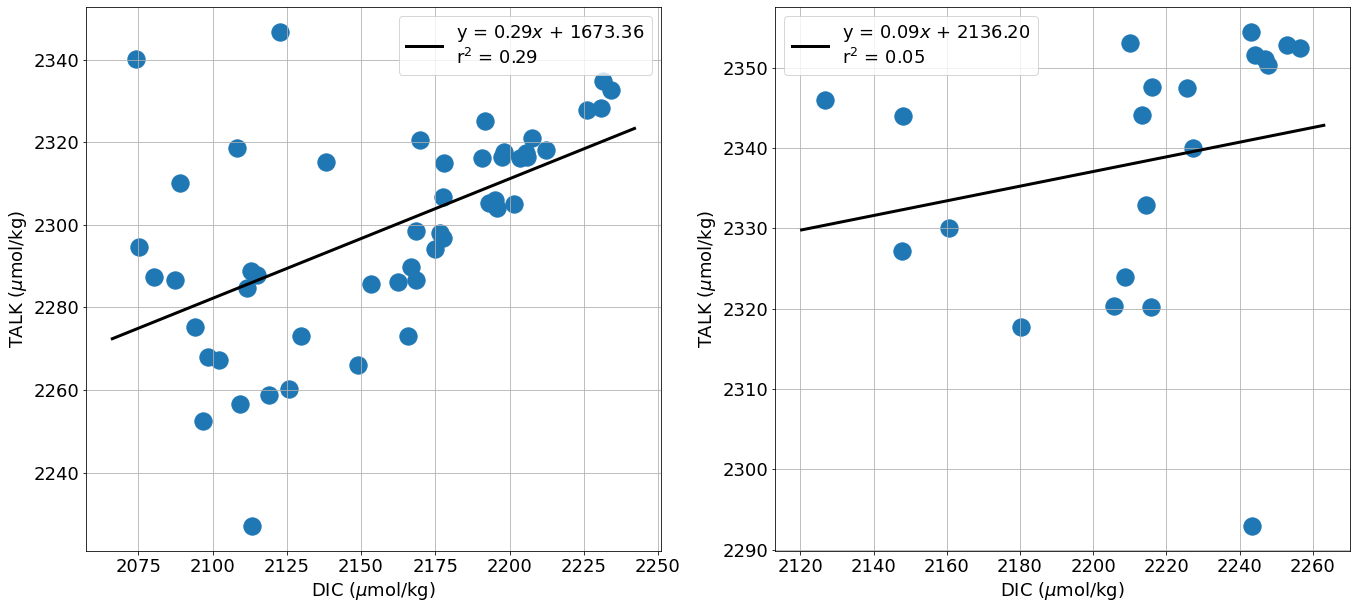

In [37]:
##Exercise 2b: S of 50S
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_S_50S_mld =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] < 200)
i_S_50S_deep =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] > 200)

plt.subplot(131)
x = dat_ctd.loc[i_S_50S_mld,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S_mld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S_mld,'DIC_corr'].values,dat_ctd.loc[i_S_50S_mld,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S_deep,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values,dat_ctd.loc[i_S_50S_deep,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)
plt.subplot(131)

C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1969172937.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)
C:\Users\MIRAND~1\AppData\Local\Temp/ipykernel_1516/1969172937.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = plt.linalg.lstsq(x, y)


<AxesSubplot:xlabel='DIC ($\\mu$mol/kg)', ylabel='TALK ($\\mu$mol/kg)'>

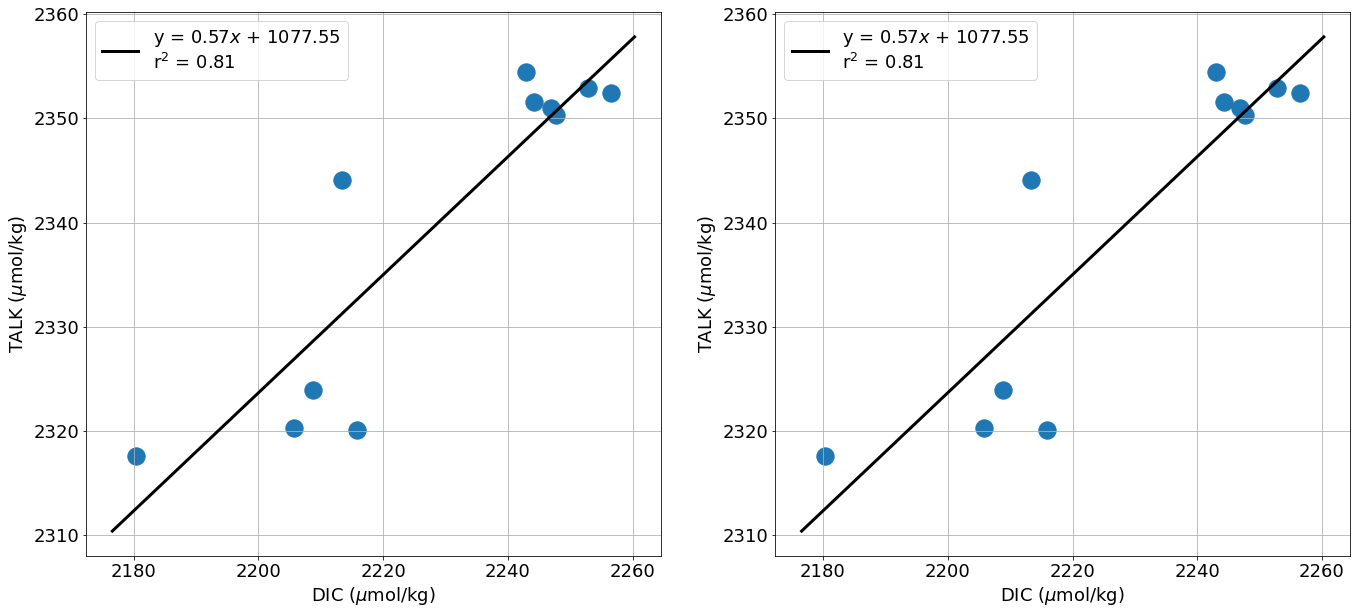

In [39]:
##Exercise 3: 
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_50S_60S_mld =  (dat_ctd['Lat.'] < -60) & (dat_ctd['depth'] > 200)
i_50S_60S_deep =  (dat_ctd['Lat.'] < -60) & (dat_ctd['depth'] > 200)

plt.subplot(131)
x = dat_ctd.loc[i_50S_60S_mld,'DIC_corr'].values
y = dat_ctd.loc[i_50S_60S_mld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_50S_60S_mld,'DIC_corr'].values,dat_ctd.loc[i_50S_60S_mld,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_50S_60S_deep,'DIC_corr'].values
y = dat_ctd.loc[i_50S_60S_deep,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_50S_60S_deep,'DIC_corr'].values,dat_ctd.loc[i_50S_60S_deep,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)
plt.subplot(131)

In [53]:
##Exercise 4: Adding density column to underway dataframe
import gsw
gsw.density.rho?

In [54]:
### Computes ocean density
density_ctd  = gsw.density.rho(dat_ctd['Salinity'].values,dat_ctd['IntakeTemp'].values,dat_ctd['depth'].values) - 1000
density_udw  = gsw.density.rho(dat_udw['Salinity'].values,dat_udw['IntkeTemp'].values,0)  - 1000

In [55]:
dat_ctd['Density'] = density_ctd
dat_ctd


,Date,bottle,Lat.,Long.,niskin,depth,DIC_corr,AT_corr,IntakeTemp,Salinity,Density
0,20140208,SAN201402085312,-43.00,7.61,1,1000,2192.701110,2304.796343,3.0072,34.3509,31.869177
1,20140208,SAN201402085313,-43.00,7.61,3,640,2162.259888,2284.102123,3.8669,34.2050,30.002287
2,20140208,SAN201402085316,-43.00,7.61,4,430,2118.514426,2276.977310,5.2348,34.2396,28.898240
3,20140208,SAN201402085314,-43.00,7.61,5,340,2143.015898,2280.034397,6.5382,34.3658,28.411024
4,20140208,SAN201402085315,-43.00,7.61,7,200,2092.350872,2284.531790,7.8054,34.4059,27.621106
...,...,...,...,...,...,...,...,...,...,...,...
114,20140129,SAN1401275312A,-70.52,-8.07,24,3,2162.600752,2286.288041,-1.4936,33.8048,27.089379
115,20140130,SAN1401305313,-70.52,-8.07,2,223,2215.829782,2320.142729,-1.8466,34.3141,28.570254
116,20140130,SAN1401305314,-70.52,-8.07,8,80,2203.419757,2316.271227,-1.7883,34.2434,27.823357
117,20140130,SAN1401305315,-70.52,-8.07,14,25,2195.717677,2304.022919,-1.6708,34.0795,27.422456


C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


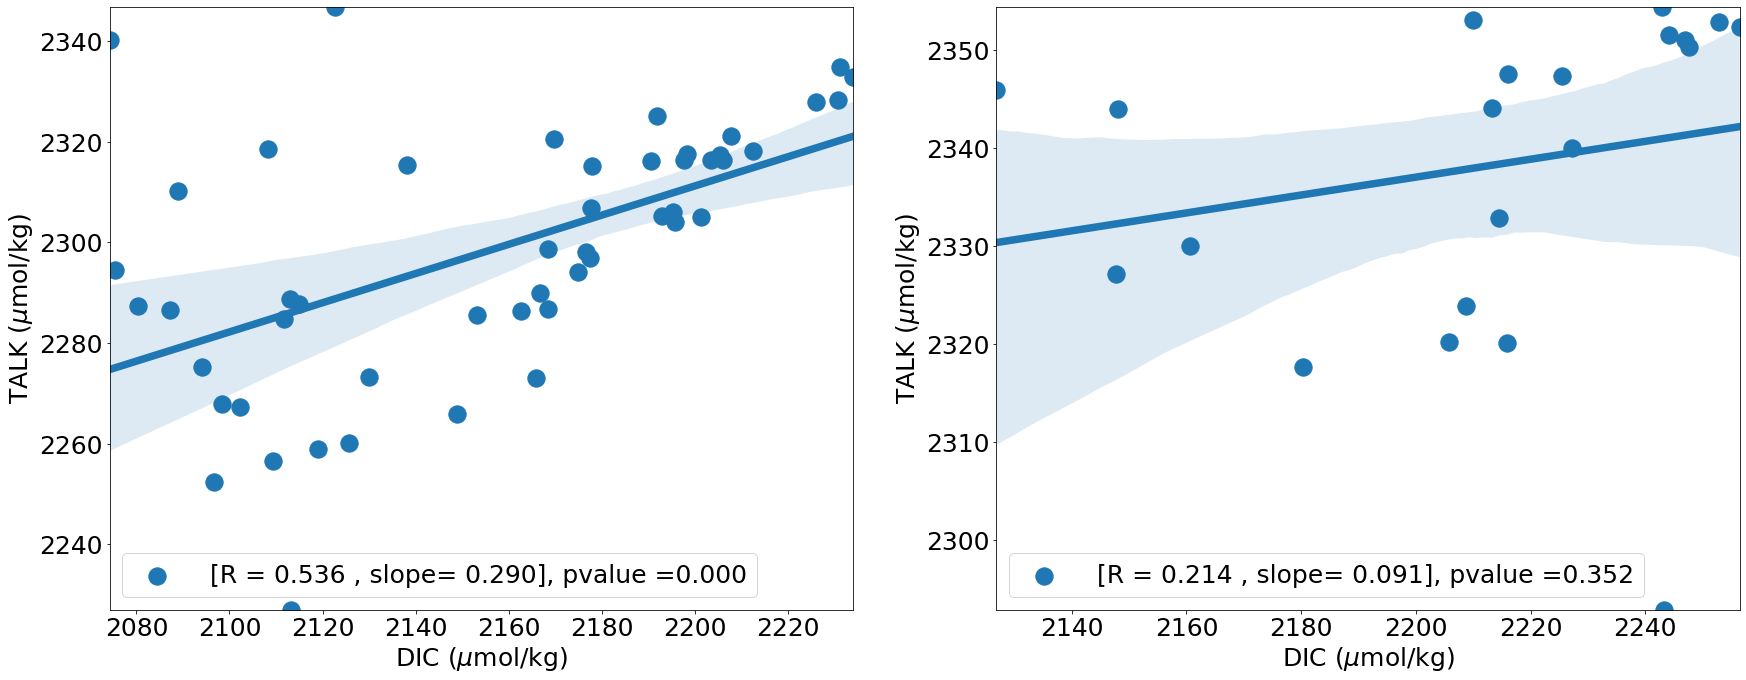

In [57]:
##Exercise 5:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

i_N_45S_mld =  (dat_ctd['Lat.'] > -45) & (dat_ctd['depth'] < 200)
i_N_45S_deep =  (dat_ctd['Lat.'] > -45) & (dat_ctd['depth'] > 200) 

i_S_45S_mld =  (dat_ctd['Lat.'] < -45) & (dat_ctd['depth'] < 200)
i_S_45S_deep =  (dat_ctd['Lat.'] < -45) & (dat_ctd['depth'] > 200)


plt.subplot(121)
X = dat_ctd.loc[i_S_45S_mld,'DIC_corr'].values
Y = dat_ctd.loc[i_S_45S_mld,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)

plt.subplot(122)
X = dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values
Y = dat_ctd.loc[i_S_50S_deep,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)


plt.tight_layout()